In [1]:
import pandas as pd
import numpy as np

In [3]:
# --- Task 1: Data Preparation ---
df = pd.read_csv('/content/Telco_Customer_Churn_Dataset  (3).csv')

# Cleaning and type conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1), drop_first=True)
y = df['Churn'].map({'No':0, 'Yes':1})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

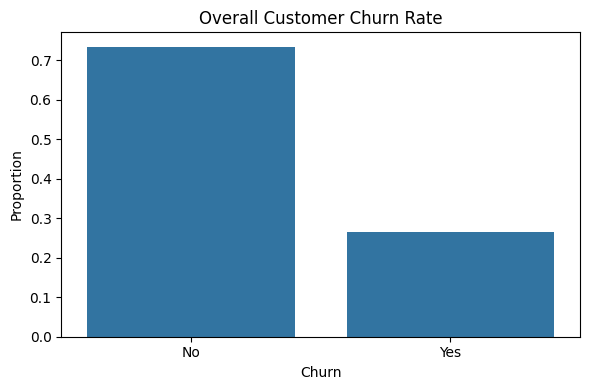

Churn by Gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
Churn by Partner:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649
Churn by Dependents:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502
Tenure statistics by Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
Churn by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319
Churn by Payment Method:
Churn                            No       Yes
PaymentMethod                             

In [4]:
# --- Task 2: Exploratory Data Analysis (EDA) ---
import matplotlib.pyplot as plt
import seaborn as sns

# Churn rate
churn_rate = y.value_counts(normalize=True)
plt.figure(figsize=(6,4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Overall Customer Churn Rate')
plt.ylabel('Proportion')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()

# Churn by gender, partner, dependents
print("Churn by Gender:")
print(pd.crosstab(df['gender'], df['Churn'], normalize='index'))

print("Churn by Partner:")
print(pd.crosstab(df['Partner'], df['Churn'], normalize='index'))

print("Churn by Dependents:")
print(pd.crosstab(df['Dependents'], df['Churn'], normalize='index'))

print("Tenure statistics by Churn:")
print(df.groupby('Churn')['tenure'].describe())

print("Churn by Contract Type:")
print(pd.crosstab(df['Contract'], df['Churn'], normalize='index'))

print("Churn by Payment Method:")
print(pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index'))

In [5]:
# --- Task 3: Customer Segmentation ---
# By tenure
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])
print("Churn by Tenure Group:")
print(pd.crosstab(df['tenure_group'], df['Churn'], normalize='index'))

# By monthly charges
df['charge_group'] = pd.cut(df['MonthlyCharges'], bins=[0,30,60,90,120], labels=['Low','Medium','High','Premium'])
print("Churn by Monthly Charges Segment:")
print(pd.crosstab(df['charge_group'], df['Churn'], normalize='index'))

# High value churn risk
high_value_churn = df[(df['MonthlyCharges'] > 80) & (df['Churn']=='Yes')]
print(f"High-value customers at risk of churning:\n{high_value_churn[['customerID','MonthlyCharges','Contract','tenure']]}")

Churn by Tenure Group:
Churn               No       Yes
tenure_group                    
0-12          0.523218  0.476782
13-24         0.712891  0.287109
25-36         0.783654  0.216346
37-48         0.809711  0.190289
49-60         0.855769  0.144231
61-72         0.933902  0.066098
Churn by Monthly Charges Segment:
Churn               No       Yes
charge_group                    
Low           0.901996  0.098004
Medium        0.740711  0.259289
High          0.660939  0.339061
Premium       0.672225  0.327775
High-value customers at risk of churning:
      customerID  MonthlyCharges        Contract  tenure
5     9305-CDSKC           99.65  Month-to-month       8
8     7892-POOKP          104.80  Month-to-month      28
13    0280-XJGEX          103.70  Month-to-month      49
26    6467-CHFZW           99.35  Month-to-month      47
38    5380-WJKOV          106.35  Month-to-month      34
...          ...             ...             ...     ...
6991  3585-ISXZP           95.65  Month-

In [10]:
# --- Task 4: Churn Prediction Model ---
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with higher max_iter
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree (scaling not needed)
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Now use y_pred_lr and y_pred_dt for evaluation!

# Example of evaluation:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))



Logistic Regression Accuracy: 0.8069552874378992
Decision Tree Accuracy: 0.7955997161107168


Logistic Regression Metrics: {'accuracy': 0.8034066713981547, 'precision': 0.6520376175548589, 'recall': 0.5561497326203209, 'f1': 0.6002886002886003}
Decision Tree Metrics: {'accuracy': 0.7955997161107168, 'precision': 0.6442953020134228, 'recall': 0.5133689839572193, 'f1': 0.5714285714285714}
Logistic Regression Feature Importances:
Contract_Two year                -1.341428
InternetService_Fiber optic       0.750786
Contract_One year                -0.688539
PhoneService_Yes                 -0.449184
OnlineSecurity_Yes               -0.431101
PaymentMethod_Electronic check    0.387788
TechSupport_Yes                  -0.381696
PaperlessBilling_Yes              0.377059
MultipleLines_Yes                 0.275753
Dependents_Yes                   -0.224504
dtype: float64
Decision Tree Feature Importances:
tenure                                  0.462674
InternetService_Fiber optic             0.392529
PaymentMethod_Electronic check          0.029584
TotalCharges                        

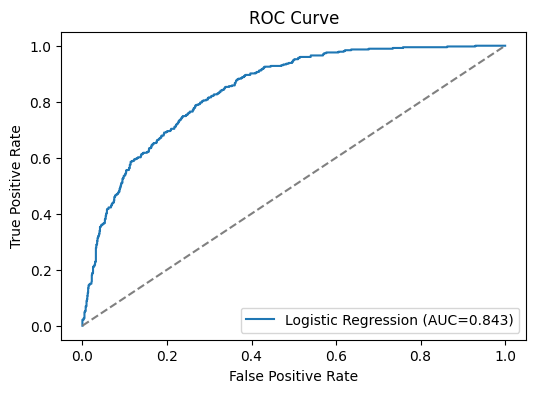

In [7]:
# --- Task 5: Model Evaluation and Interpretation ---
def model_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

print("Logistic Regression Metrics:", model_metrics(y_test, y_pred_lr))
print("Decision Tree Metrics:", model_metrics(y_test, y_pred_dt))

print("Logistic Regression Feature Importances:")
lr_coef = pd.Series(lr.coef_[0], index=X_train.columns)
print(lr_coef.sort_values(key=abs, ascending=False).head(10)) # Top 10 important features

print("Decision Tree Feature Importances:")
dt_imp = pd.Series(dt.feature_importances_, index=X_train.columns)
print(dt_imp.sort_values(ascending=False).head(10)) # Top 10

# ROC Curve and AUC for best model
lr_probs = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
auc = roc_auc_score(y_test, lr_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC=%.3f)' % auc)
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [9]:
# --- Task 6: Business Recommendations ---
print("""
Recommendations:
- Target Month-to-Month contract customers with retention offers (highest churn).
- Focus on electronic check payment users with incentives to switch payment methods.
- Higher tenure reduces churn—consider loyalty programs for new customers.
- Provide personalized offers to high-value customers at risk.
- Improve partner/dependent support to reduce churn.

Potential Impact:
- Reducing churn among high-value 'at risk' customers can significantly improve monthly revenue.
""")



Recommendations:
- Target Month-to-Month contract customers with retention offers (highest churn).
- Focus on electronic check payment users with incentives to switch payment methods.
- Higher tenure reduces churn—consider loyalty programs for new customers.
- Provide personalized offers to high-value customers at risk.
- Improve partner/dependent support to reduce churn.

Potential Impact:
- Reducing churn among high-value 'at risk' customers can significantly improve monthly revenue.

